![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [254]:
beer = pd.read_csv("data/datasets_beers.csv")
beer


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [255]:

beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


### El dataset contiene 2,410 filas y 8 columnas:

- Unnamed: 0: Parece un índice innecesario.

- abv: Contenido de alcohol por volumen (ABV), con algunos valores nulos.

- ibu: Índice de amargor (IBU), con muchos valores nulos.

- id: Identificador único de la cerveza.

- name: Nombre de la cerveza.

- style: Estilo de la cerveza, con pocos valores nulos.

- brewery_id: Identificador de la cervecería.

- ounces: Tamaño de la lata/botella en onzas.

In [256]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [257]:
beer.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [258]:
# cuantos nulos tiene

print(beer.isnull().sum())


Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64


In [259]:
list(beer)

['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [260]:
beer.drop(columns=["Unnamed: 0"], inplace=True)

beer


,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [261]:
# Con shape nos dice cuantas filas y cuantas columnas tiene el df
fil_cols = beer.shape
fil_cols

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [262]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [263]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [264]:
beer_resumen = beer.describe()
beer_resumen

# count,suma total devalores que no sean nulos 
# std = desviación estandar

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [265]:
beer["style"]

0                  American Pale Lager
1              American Pale Ale (APA)
2                         American IPA
3       American Double / Imperial IPA
4                         American IPA
                     ...              
2405                       Belgian IPA
2406          American Amber / Red Ale
2407                       Schwarzbier
2408           American Pale Ale (APA)
2409          American Amber / Red Ale
Name: style, Length: 2410, dtype: object

In [266]:
conteo_estilos = beer["style"].value_counts()

conteo_estilos

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

In [267]:


""" # Tengo dudas en esta parte
styles = pd.Series(['IPA', 'Lager', 'Stout', 'IPA', 'Pilsner', 'Lager', 'IPA'])

# Para contar las ocurrencias de cada estilo
conteo_estilos = styles.value_counts()

print(conteo_estilos) """


" # Tengo dudas en esta parte\nstyles = pd.Series(['IPA', 'Lager', 'Stout', 'IPA', 'Pilsner', 'Lager', 'IPA'])\n\n# Para contar las ocurrencias de cada estilo\nconteo_estilos = styles.value_counts()\n\nprint(conteo_estilos) "

In [268]:
estilos_unicos = pd.Series(beer["style"].unique())
estilos_unicos

0                American Pale Lager
1            American Pale Ale (APA)
2                       American IPA
3     American Double / Imperial IPA
4                      Oatmeal Stout
                   ...              
95                        Chile Beer
96                          Grisette
97                Flanders Oud Bruin
98                           Braggot
99                  Low Alcohol Beer
Length: 100, dtype: object

In [269]:
# Contar las ocurrencias de cada estilo directamente desde la columna 'styles'
conteo_estilos = beer["style"].value_counts()

print(conteo_estilos)


style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64


In [270]:

beer.groupby("style")["name"].count()

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: name, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [271]:
# 1 registros desde el décimo hasta el vigésimo

registros = beer.loc[10:21]
registros

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [272]:
registros  = beer.loc[9:20][['name', 'style', 'ounces']]

registros

,name,style,ounces
9,Cone Crusher,American Double / Imperial IPA,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,12.0
12,Garce Selé,Saison / Farmhouse Ale,12.0
13,Troll Destroyer,Belgian IPA,12.0
14,Bitter Bitch,American Pale Ale (APA),12.0
15,Ginja Ninja,Cider,12.0
16,Cherried Away,Cider,12.0
17,Rhubarbarian,Cider,12.0
18,BrightCider,Cider,12.0


In [273]:
registros_n = registros.to_numpy()
registros_n

array([['Cone Crusher', 'American Double / Imperial IPA', 12.0],
       ['Sophomoric Saison', 'Saison / Farmhouse Ale', 12.0],
       ['Regional Ring Of Fire', 'Saison / Farmhouse Ale', 12.0],
       ['Garce Selé', 'Saison / Farmhouse Ale', 12.0],
       ['Troll Destroyer', 'Belgian IPA', 12.0],
       ['Bitter Bitch', 'American Pale Ale (APA)', 12.0],
       ['Ginja Ninja', 'Cider', 12.0],
       ['Cherried Away', 'Cider', 12.0],
       ['Rhubarbarian', 'Cider', 12.0],
       ['BrightCider', 'Cider', 12.0],
       ['He Said Baltic-Style Porter', 'Baltic Porter', 12.0],
       ['He Said Belgian-Style Tripel', 'Tripel', 12.0]], dtype=object)

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [274]:
total_onzas = beer["ounces"].sum()

print(f"El total de onzas de todas las birras es: {total_onzas}")

El total de onzas de todas las birras es: 32757.3


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [275]:
# 1 amargaor medio, lo hacemos con mean

promedio_ibu = beer["ibu"].mean().round(2)

print(f"El promedio de IBUs de todas las cervezas es: {promedio_ibu}")

# Obtener el valor máximo de IBUs, con max
max_ibu = beer["ibu"].max()

# Obtener el valor mínimo de IBUs, con min
min_ibu = beer["ibu"].min()

print(f"El valor máximo de IBU es: {max_ibu}")
print(f"El valor mínimo de IBU es: {min_ibu}")

# que cerveza tiene el amargor mmáximo y amargor mínimo
# Buscamos el índice de la cerveza con el amargor máximo
indice_max_ibu = beer["ibu"].idxmax()

# Buscamos el índice de la cerveza con el amargor mínimo
indice_min_ibu = beer["ibu"].idxmin()

# Con loc 
cerveza_max_ibu = beer.loc[indice_max_ibu]
cerveza_min_ibu = beer.loc[indice_min_ibu]

print(f"La cerveza con el amargor máximo es: {cerveza_max_ibu['name']} con {cerveza_max_ibu['ibu']} IBU")
print(f"La cerveza con el amargor mínimo es: {cerveza_min_ibu['name']} con {cerveza_min_ibu['ibu']} IBU")


El promedio de IBUs de todas las cervezas es: 42.71
El valor máximo de IBU es: 138.0
El valor mínimo de IBU es: 4.0
La cerveza con el amargor máximo es: Bitter Bitch Imperial IPA con 138.0 IBU
La cerveza con el amargor mínimo es: Summer Solstice con 4.0 IBU


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

Desviación estándar de IBU: 25.95
Rango intercuartílico (IQR) de IBU: 43.0


<Axes: >

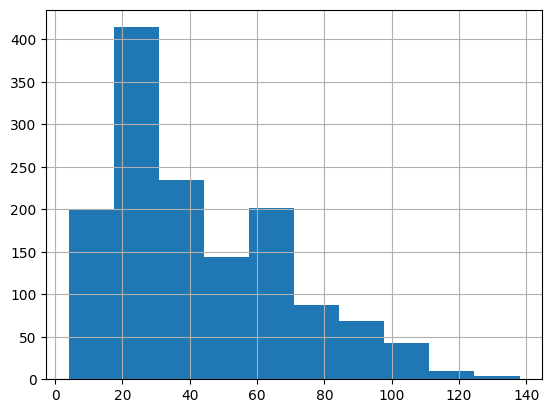

In [276]:
# Desviación estándar (std): Mide la cantidad de variabilidad o dispersión de los datos respecto a la media.
# Cuanto mayor sea la desviación estándar, más dispersos están los datos.

# Rango intercuartílico (IQR): Es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1).
# Este valor mide la dispersión del 50% central de los datos y es menos sensible a valores extremos o outliers.

# primero medi y mediana
mean = beer["ibu"].mean().round(1)
median = beer["ibu"].median().round(1)

# Desviación estándar de la columna 'ibu'
std_ibu = beer['ibu'].std().round(2)

# Rango intercuartílico (IQR) de la columna 'ibu'
iqr_ibu = beer['ibu'].quantile(0.75) - beer['ibu'].quantile(0.25)

# Mostrar los resultados
print(f'Desviación estándar de IBU: {std_ibu}')
print(f'Rango intercuartílico (IQR) de IBU: {iqr_ibu}')


# Desviación estándar: Si la desviación estándar es alta, esto indica que los valores de IBU están muy dispersos alrededor de la media.
# Si la desviación estándar es baja, los valores de IBU están más concentrados alrededor de la media.
# Rango intercuartílico (IQR): Un IQR grande indica que los valores de IBU están más dispersos en la parte central de la distribución
# (es decir, los 50% de los datos están más alejados entre sí).
# Un IQR pequeño indica que los valores centrales de IBU están más concentrados.

beer["ibu"].hist()

In [277]:
beer["ibu"].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

                 abv       ibu        id  brewery_id    ounces
abv         1.000000  0.670621  0.042811   -0.098632  0.172529
ibu         0.670621  1.000000  0.000485   -0.004875  0.054691
id          0.042811  0.000485  1.000000   -0.504030  0.100843
brewery_id -0.098632 -0.004875 -0.504030    1.000000 -0.133762
ounces      0.172529  0.054691  0.100843   -0.133762  1.000000


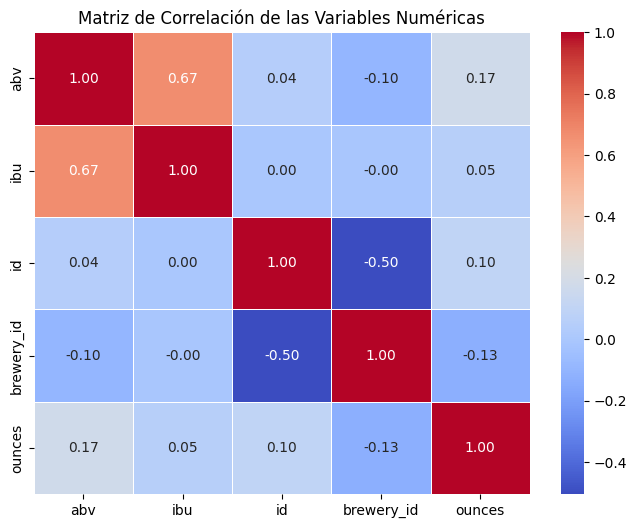

In [278]:
# Selecciona solo las columnas numéricas
beer_numeric = beer.select_dtypes(include=['number'])

# calcula la matriz de correlación, que mide la relación entre cada par de variables numéricas en el DataFrame.
# La correlación varía entre -1 y 1
# Cercano a 1 → Fuerte correlación positiva (si una variable aumenta, la otra también).
# Cercano a -1 → Fuerte correlación negativa (si una variable aumenta, la otra disminuye).
# Cercano a 0 → No hay relación entre las variables.
correlation_matrix = beer_numeric.corr()

# Matriz de correlación
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título y etiquetas
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()

# en verdad tendría que coger solo el abv y el ibu (abv (alcohol por volumen) e ibu (amargor))

#### Conclusión
- El alcohol (abv) y el amargor (ibu) están relacionados. Hay una relación lineal moderada-fuerte entre abv (alcohol por volumen) e ibu.
- La relación entre id y brewery_id sugiere una correlación negativa moderada. (-0.50)
- Relación entre ounces (tamaño de la cerveza) y abv (alcohol)(0.172529) correlación positiva débil 


🔹 Relación más fuerte:
ABV (Alcohol por Volumen) vs IBU (Índice de Amargor) → 0.67

Existe una correlación positiva moderada-alta entre el contenido de alcohol y el amargor.

Interpretación: Las cervezas con mayor contenido alcohólico tienden a ser más amargas.

Posible explicación: Muchas cervezas más fuertes (como las IPAs) usan más lúpulo, lo que aumenta el IBU.

🔹 Otras correlaciones relevantes:
ID vs Brewery_ID → -0.50

Hay una correlación negativa moderada.

Interpretación: A medida que el id de la cerveza aumenta, el brewery_id tiende a disminuir.

Posible explicación: Puede haber una asignación inversa de IDs en la base de datos.

ABV vs Ounces → 0.17

Hay una correlación positiva débil.

Interpretación: No hay una fuerte relación entre el tamaño del envase y el contenido de alcohol.

🔹 Relaciones sin conexión fuerte:
IBU vs Brewery_ID → -0.00

No hay relación entre el amargor y la cervecera de origen.

Interpretación: Las cerveceras producen cervezas con distintos niveles de amargor sin un patrón definido.

ID vs Ounces → 0.10

Relación casi nula, por lo que los identificadores no están relacionados con el tamaño del envase.

Conclusión general:
Sí hay relaciones lineales en el dataset, pero solo en ciertos pares de variables.

La correlación más fuerte es entre ABV e IBU, lo cual es esperado en la industria cervecera.

No hay una relación clara entre ID, brewery_id y ounces con otras variables, lo que sugiere que estos datos no están relacionados directamente con las características de la cerveza.

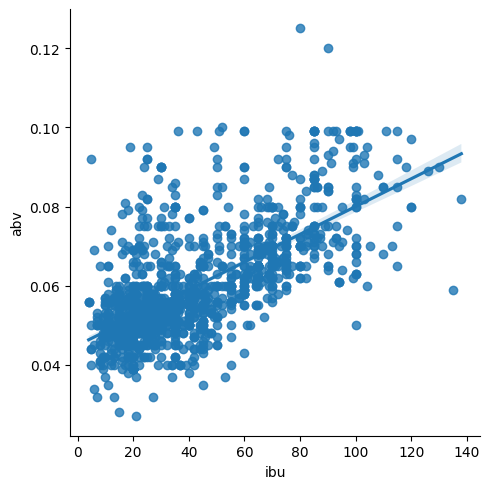

In [279]:
# Probando otra forma
sns.lmplot(x="ibu", y="abv", data=beer, fit_reg=True);


In [280]:
""" sns.heatmap(beer_numeric.corr(), values=-1, vmax=-1, center=) """

' sns.heatmap(beer_numeric.corr(), values=-1, vmax=-1, center=) '

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

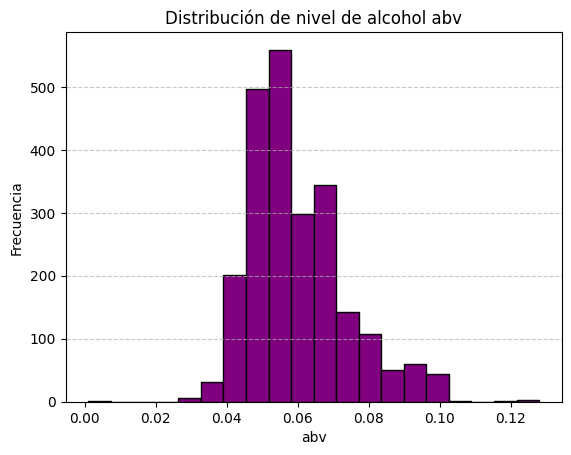

In [281]:
plt.hist(beer["abv"], bins=20, color='purple', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de nivel de alcohol abv')
plt.xlabel('abv')
plt.ylabel('Frecuencia') 
plt.grid(axis="y", linestyle = "--", alpha=0.7)
# Mostrar el gráfico
plt.show()

##### Asimétrica: El histograma tiene una cola más larga hacia un lado (derecha), está sesgado y es asimétrico. Tiene una asimetría positiva.

Conclusión sobre la distribución del nivel de alcohol (abv)
Distribución sesgada a la derecha

La mayoría de las cervezas tienen un contenido de alcohol (abv) entre 0.04 (4%) y 0.07 (7%).

Hay una menor cantidad de cervezas con un abv superior a 0.08 (8%), lo que sugiere que las cervezas de alto contenido alcohólico son menos comunes.

Moda y concentración

El pico más alto de la distribución (moda) está alrededor del 0.05 - 0.06 (5%-6%), lo que indica que la mayoría de las cervezas en este dataset tienen un contenido alcohólico en este rango.

Presencia de valores atípicos

Hay pocas cervezas con abv superior a 0.10 (10%), lo que sugiere que las cervezas extremadamente alcohólicas son raras en este conjunto de datos.

Interpretación general
Este patrón es típico en cervezas comerciales, donde la mayoría se encuentra entre 4%-7% de alcohol.


In [282]:
# Calcular el coeficiente de asimetría para la columna 'abv'
skewness_abv = beer['abv'].skew().round(3)

print(f'Coeficiente de asimetría (Skewness) de la columna abv: {skewness_abv}')


Coeficiente de asimetría (Skewness) de la columna abv: 0.958


## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

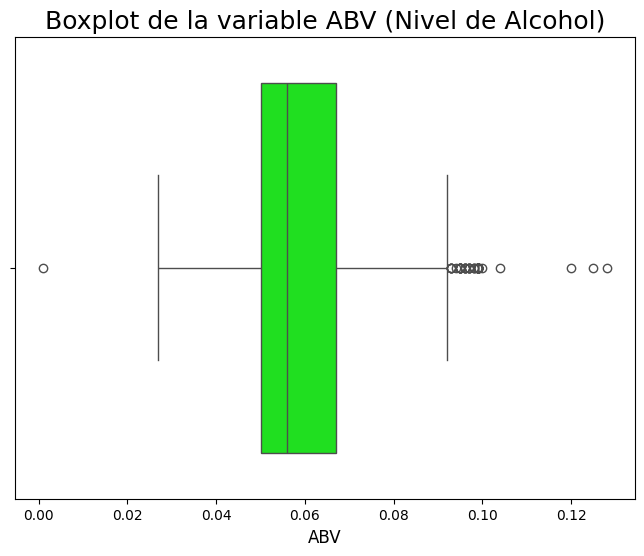

In [283]:
# Crear el boxplot de la variable 'abv'
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=beer["abv"], color='lime')

# Añadir título y etiquetas
plt.title('Boxplot de la variable ABV (Nivel de Alcohol)', fontsize=18)
plt.xlabel('ABV', fontsize=12)

# Mostrar el gráfico
plt.show()

Conclusión sobre el Boxplot del nivel de alcohol (ABV)
Distribución y Mediana

La mediana del ABV se encuentra alrededor de 0.06 (6%), lo que indica que al menos el 50% de las cervezas tienen un nivel de alcohol igual o inferior a este valor.

La caja del boxplot (rango intercuartil o IQR) indica que la mayoría de los valores de ABV están concentrados entre aproximadamente 0.05 (5%) y 0.07 (7%).


Simetría y Dispersión

La distribución parece estar ligeramente sesgada a la derecha, ya que la cola superior es más larga debido a la presencia de cervezas con ABV alto.

No hay una dispersión extrema, pero los valores atípicos muestran que algunas cervezas tienen un nivel de alcohol bastante diferente del resto.

los bigotes, 1,5 indice intercuartil

Conclusión general
La mayoría de las cervezas tienen entre 5% y 7% de alcohol, lo que es común en el mercado.

Existen algunas cervezas con niveles de alcohol muy altos (>10%), pero son minoría.

La distribución está ligeramente sesgada hacia valores altos, lo que significa que hay más cervezas con alto ABV que con bajo ABV.

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [284]:
# Calcular la media de 'abv' y 'ibu' por 'styles'
mean_abv_by_style = beer.groupby('style')['abv'].mean()
mean_ibu_by_style = beer.groupby('style')['ibu'].mean()

# Mostrar los estilos con más alcohol en media
most_alcoholic_style = mean_abv_by_style.idxmax()
most_alcoholic_value = mean_abv_by_style.max()

# Mostrar los estilos con más amargor en media
most_bitter_style = mean_ibu_by_style.idxmax()
most_bitter_value = mean_ibu_by_style.max()

print(f"Estilo con más alcohol en media: {most_alcoholic_style} ({most_alcoholic_value:.2f} ABV)")
print(f"Estilo con más amargor en media: {most_bitter_style} ({most_bitter_value:.2f} IBU)")




Estilo con más alcohol en media: English Barleywine (0.11 ABV)
Estilo con más amargor en media: American Barleywine (96.00 IBU)


In [285]:
ean_abv_by_style = beer.groupby('style')['abv'].mean().sort_values().tail(4)
mean_ibu_by_style = beer.groupby('style')['ibu'].mean().sort_values()

ean_abv_by_style
mean_ibu_by_style

style
Berliner Weissbier         7.800000
Gose                       9.428571
American Adjunct Lager    11.000000
Light Lager               11.666667
Fruit / Vegetable Beer    14.200000
                            ...    
Kristalweizen                   NaN
Low Alcohol Beer                NaN
Mead                            NaN
Rauchbier                       NaN
Shandy                          NaN
Name: ibu, Length: 99, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [286]:
breweries = pd.read_csv("data/datasets_breweries.csv")
breweries

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [287]:

breweries.rename(columns={"Unnamed: 0": "brewery_id","name": "brewery_name" }, inplace=True)

breweries


,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [288]:
# Hacer el merge entre los datasets 'beers' y 'breweries' usando 'brewery_id', que es la ccolumna que tienen en común
# how= "inner" mantiene solo las filas que tienen valores coincidentes en ambas tablas según la columna clave, tienen que coincidir todos los registros
# left = es lo más habitual
# outer
merged_df = pd.merge(beer, breweries, on='brewery_id', how='inner')


merged_df


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [289]:
# Usamos nuniques para contar la cantidad de valores únicos en una columna o en todo el df

# Número de estados diferentes
num_states = len(breweries['state'].unique())
print(f"Hay {num_states} estados diferentes.")

# Número de ciudades diferentes
num_cities = len(breweries['city'].unique())
print(f"Hay {num_cities} ciudades diferentes.")

# Número de cervecerías diferentes
num_breweries = len(breweries['brewery_id'].unique())
print(f"Hay {num_breweries} cervecerías.")



Hay 51 estados diferentes.
Hay 384 ciudades diferentes.
Hay 558 cervecerías.


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [290]:
# Agrupar por estado y ciudad, luego calcular la media, mediana y máximo del nivel de alcohol (abv)
alcohol_stats = merged_df.groupby(["state", "city"])["abv"].agg(["mean", "median", "max"]).round(3)

# Ver los resultados
alcohol_stats


mean  median    max
state city                            
AK    Anchorage   0.054   0.052  0.063
      Juneau      0.053   0.053  0.053
      Soldotna    0.058   0.058  0.068
      Talkeetna   0.059   0.058  0.065
AL    Birmingham  0.065   0.060  0.093
...                 ...     ...    ...
WI    Wilson      0.055   0.055  0.055
WV    Lewisburg   0.062   0.062  0.067
WY    Jackson     0.055   0.052  0.068
      Pinedale    0.061   0.061  0.072
      Sheridan    0.053   0.048  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [291]:
print(merged_df['state'].unique())


[' OR' ' IN' ' CA' ' FL' ' MO' ' WA' ' CO' ' LA' ' KY' ' AK' ' WI' ' OH'
 ' OK' ' NC' ' MI' ' TX' ' CT' ' AL' ' MA' ' AZ' ' MN' ' ME' ' VA' ' IL'
 ' TN' ' MT' ' WY' ' NE' ' NY' ' UT' ' NJ' ' PA' ' NV' ' SC' ' GA' ' RI'
 ' IA' ' AR' ' ID' ' SD' ' DC' ' KS' ' ND' ' VT' ' MD' ' WV' ' HI' ' DE'
 ' NM' ' MS' ' NH']


In [292]:
print(merged_df['state'].isnull().sum())  # Contar los valores faltantes


0


In [293]:
merged_df = merged_df.dropna(subset=['state'])  # Eliminar filas con valores NaN en 'state'


In [294]:
# Filtrar cervezas del estado 'IN' (Indiana)
indiana_beers = merged_df[merged_df['state'] == ' IN']

# Ordenar las cervezas de Indiana por IBU en orden descendente para obtener las más amargas
most_bitter_indiana_beers = indiana_beers.sort_values(by='ibu', ascending=False)

# Ver las primeras cervezas más amargas
print(most_bitter_indiana_beers[['name', 'ibu']].head())

                       name    ibu
479        Hopkick Dropkick  115.0
2191  Overlord Imperial IPA  115.0
811          Half Cycle IPA  104.0
2062                   Isis   91.0
2189                   Csar   90.0


In [295]:
print(indiana_beers.shape)  # Verifica cuántas filas tiene

(139, 10)


In [296]:
# Ejercicio resuelto

cervezas_in = merged_df.loc[merged_df["state"] == " IN", ["ibu", "name"]]
# print(cervezas_in)

bitter = cervezas_in.dropna().sort_values(by="ibu", ascending=False)
print(bitter)

        ibu                              name
479   115.0                  Hopkick Dropkick
2191  115.0             Overlord Imperial IPA
811   104.0                    Half Cycle IPA
2062   91.0                              Isis
2189   90.0                              Csar
...     ...                               ...
55     15.0                      Honey Kolsch
2276   15.0                  Upland Wheat Ale
940    13.0  Great Crescent Belgian Style Wit
2188   12.0            Damascene Apricot Sour
586     8.0                         Ale Cider

[91 rows x 2 columns]


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [297]:
# Agrupar por ciudad y calcular los principales estadísticos del campo 'ibu'
ibu_stats_by_city = merged_df.groupby('city')['ibu'].describe()

# Ver los resultados
ibu_stats_by_city


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [298]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

In [299]:
# Filtrar cervezas con un abv mínimo de 0.07
high_abv_beers = merged_df[merged_df['abv'] >= 0.07]

""" # Obtener las cervecerías correspondientes a esas cervezas
breweries_with_high_abv = high_abv_beers['brewery_id'].unique()

# Filtrar todas las cervezas de esas cervecerías
all_beers_from_high_abv_breweries = merged_df[merged_df['brewery_id'].isin(breweries_with_high_abv)] # el método isin() para obtener todas las cervezas que pertenecen a las cervecerías obtenidas en el paso anterior

all_beers_from_high_abv_breweries """

high_abv_beers


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2380,0.080,31.0,761,P-51 Porter,American Porter,509,16.0,Wingman Brewers,Tacoma,WA
2382,0.071,60.0,2148,#002 American I.P.A.,American IPA,211,12.0,Wisconsin Brewing Company,Verona,WI
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
2402,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [300]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total

In [301]:
# Calcular la media del amargor (ibu) de todas las cervezas
overall_mean_ibu = merged_df['ibu'].mean()

# Calcular la media de amargor por estado
state_mean_ibu = merged_df.groupby('state')['ibu'].mean()

# Filtrar los estados cuya media de amargor está por encima de la media general
states_above_mean = state_mean_ibu[state_mean_ibu > overall_mean_ibu].index

# Filtrar las cervezas cuyo estado está en la lista de estados con media de amargor superior
beers_above_mean_ibu = merged_df[merged_df['state'].isin(states_above_mean)]

# Mostrar el DataFrame resultante
beers_above_mean_ibu[['name', 'state', 'ibu']]


,name,state,ibu
0,Pub Beer,OR,NaN
1,Devil's Cup,IN,NaN
2,Rise of the Phoenix,IN,NaN
3,Sinister,IN,NaN
4,Sex and Candy,IN,NaN
...,...,...,...
2405,Belgorado,CO,45.0
2406,Rail Yard Ale,CO,NaN
2407,B3K Black Lager,CO,NaN
2408,Silverback Pale Ale,CO,40.0


In [302]:
# merged_df["medias_cerv"] = merged_df.groupby("states")["ibu"].transform("mean")

# merged_df.loc[merged_df["ibu"].mean()merged_df["ibu","medias_cerv", "name"]]



# merged_df["medias_cerv"] = merged_df.groupby("state")["ibu"].transform("mean")

# # Filtrar donde ibu sea mayor que la media de su estado
# resultado = merged_df[merged_df["ibu"].mean() > merged_df["ibu","medias_cerv", "name"]]
# print(resultado)
